In [2]:
import uproot3
import awkward0 as awk
import numpy as np
import matplotlib.pyplot as plt
import uproot_methods
import uproot3_methods

In [3]:
import os
import sys

In [4]:
# input_file = uproot3.open("/cms/routray/crab_output/muontuples_10percent_v2/ScoutingCaloMuon/ScoutingCaloMuon_Ntuples_Run2017D_v1/200307_225553/0000/scouting_ntuple_1.root")
#print("kind of objects: ", input_file.classnames())                                                                                                                                 

#ROOT.TFile('/cms/routray/crab_output/muontuples_10percent_v2/ScoutingCaloMuon/ScoutingCaloMuon_Ntuples_Run2017D_v1/200307_225553/0000/scouting_ntuple_{0}.root'.format(sys.argv[1]))

In [5]:
input_file = uproot3.open("/cms/threejet-2/beatrice/muon_ntuples_sl7/CMSSW_10_2_5/src/MuonAnalysis/Scouting/condor/output/2017/D/flattree_1.root")


In [6]:
data_keys = input_file.keys()
print(data_keys)


[b'events;4']


In [7]:
tree = input_file["events"]

vals = tree.keys()
print("Tree keys:")
print(vals)

Tree keys:
[b'run', b'lumi', b'event_num', b'num_muons', b'allmuons_pt', b'allmuons_eta', b'allmuons_phi', b'allmuons_trkiso', b'dimuon_pt', b'dimuon_mass', b'dimuon_dR', b'muon1_trkiso', b'muon2_trkiso', b'muon1_pt', b'muon2_pt', b'muon1_eta', b'muon2_eta', b'muon1_phi', b'muon2_phi', b'muon1_excesspixelhits', b'muon2_excesspixelhits', b'muon1_q', b'muon2_q', b'muon1_chi2overndof', b'muon2_chi2overndof', b'muon1_dxy', b'muon2_dxy', b'muon1_dxycorr', b'muon2_dxycorr', b'num_jets', b'jet_pt', b'jet_eta', b'jet_phi', b'jet_mass', b'jet_csv', b'PVx', b'PVy', b'PVz', b'dRmuon1_closestjet', b'dRmuon2_closestjet']


In [8]:
tree.show()

run                        (no streamer)              asdtype('>i4')
lumi                       (no streamer)              asdtype('>i4')
event_num                  (no streamer)              asdtype('>i4')
num_muons                  (no streamer)              asdtype('>i4')
allmuons_pt                (no streamer)              asjagged(asdtype('>f4'))
allmuons_eta               (no streamer)              asjagged(asdtype('>f4'))
allmuons_phi               (no streamer)              asjagged(asdtype('>f4'))
allmuons_trkiso            (no streamer)              asjagged(asdtype('>f4'))
dimuon_pt                  (no streamer)              asdtype('>f4')
dimuon_mass                (no streamer)              asdtype('>f4')
dimuon_dR                  (no streamer)              asdtype('>f4')
muon1_trkiso               (no streamer)              asdtype('>f4')
muon2_trkiso               (no streamer)              asdtype('>f4')
muon1_pt                   (no streamer)              asdtype('

In [9]:
branches = tree.arrays(namedecode='utf-8')
#print(branches['Run'])                                                                                                                                                              
print("First 10 dimuon_pt values:")
for i in range(10):
    print(branches['dimuon_pt'][i])

First 10 dimuon_pt values:
20.082949
15.351138
13.806104
10.060834
6.915235
10.281326
8.663606
11.114048
7.8796453
5.9019985


In [10]:
#convert to table                                                                                                                                                                    
table = awk.Table(branches)
for column_name in table[0]:                                                                                                                                                        
    print(column_name, '=', table[0][column_name])                                                                                                                                  

run = 1217631232
lumi = 1139179520
event_num = -1174405120
num_muons = 2
allmuons_pt = [10.454581  9.635884]
allmuons_eta = [-0.85237616 -0.9754718 ]
allmuons_phi = [0.4716349 0.5263894]
allmuons_trkiso = [1.4855125 1.6117266]
dimuon_pt = 20.082949
dimuon_mass = 1.3693004
dimuon_dR = 0.13472414
muon1_trkiso = 10.454581
muon2_trkiso = 9.635884
muon1_pt = 10.454581
muon2_pt = 9.635884
muon1_eta = -0.85237616
muon2_eta = -0.9754718
muon1_phi = 0.4716349
muon2_phi = 0.5263894
muon1_excesspixelhits = -1.0
muon2_excesspixelhits = 0.0
muon1_q = -1.0
muon2_q = 1.0
muon1_chi2overndof = 0.39492097
muon2_chi2overndof = 0.7395577
muon1_dxy = -0.0568195
muon2_dxy = -0.07153648
muon1_dxycorr = 0.0076186466
muon2_dxycorr = 0.0012415313
num_jets = 4
jet_pt = [42.177284 37.249386 27.812614 25.330395]
jet_eta = [-0.9211465  -0.35868797  1.2820317  -0.4386022 ]
jet_phi = [ 0.51036906 -2.9242043  -2.1582053   0.0526711 ]
jet_mass = [6.289423 6.561092 4.006046 2.932295]
jet_csv = [-20. -20. -20. -20.]
PVx 

# NO CUTS
## (Sanity Check)

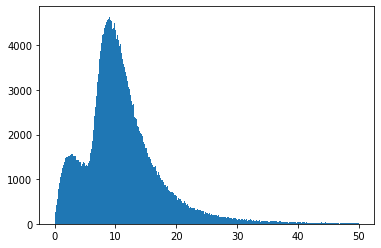

In [11]:
#plot histograms                                                                                                                                                                     
plt.hist(branches['dimuon_pt'].flatten(), bins=1000, range=(0,50))
plt.show()

In [12]:
#NO CUTS
mu1p_nocuts = uproot3_methods.TLorentzVectorArray.from_ptetaphim(table['muon1_pt'], table['muon1_eta'], table['muon1_phi'], 0.1056583745)
mu2p_nocuts = uproot3_methods.TLorentzVectorArray.from_ptetaphim(table['muon2_pt'], table['muon2_eta'], table['muon2_phi'], 0.1056583745)
parentp_nocuts = mu1p_nocuts + mu2p_nocuts

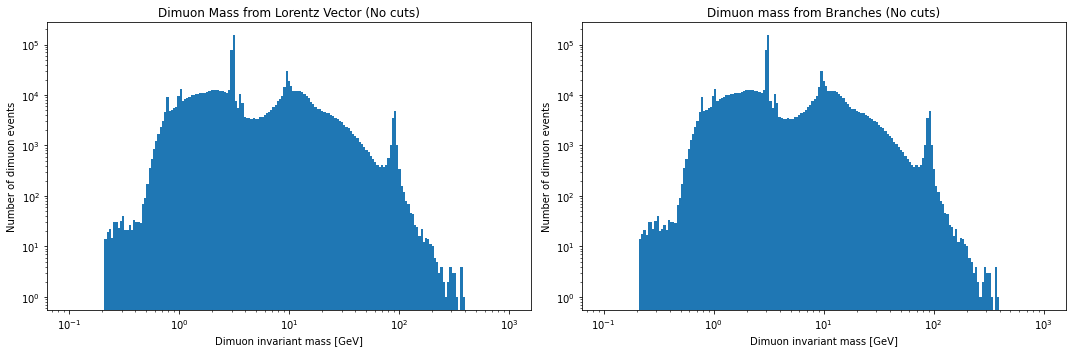

In [13]:
#No cuts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].hist(parentp_nocuts.mass, bins=np.logspace(np.log10(0.1), np.log10(1000), 200))
axes[0].set_title('Dimuon Mass from Lorentz Vector (No cuts)')
axes[0].set_xlabel('Dimuon invariant mass [GeV]')
axes[0].set_ylabel('Number of dimuon events')
axes[0].set_xscale('log')
axes[0].set_yscale('log')

# axes[1].hist(branches['dimuon_mass'].flatten(), bins=100, range=(0,5))
dimuon_mass_branches = branches['dimuon_mass'].flatten()
axes[1].hist(dimuon_mass_branches, bins=np.logspace(np.log10(0.1), np.log10(1000), 200))
axes[1].set_title('Dimuon mass from Branches (No cuts)')
axes[1].set_xlabel('Dimuon invariant mass [GeV]')
axes[1].set_ylabel('Number of dimuon events')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

fig.tight_layout()

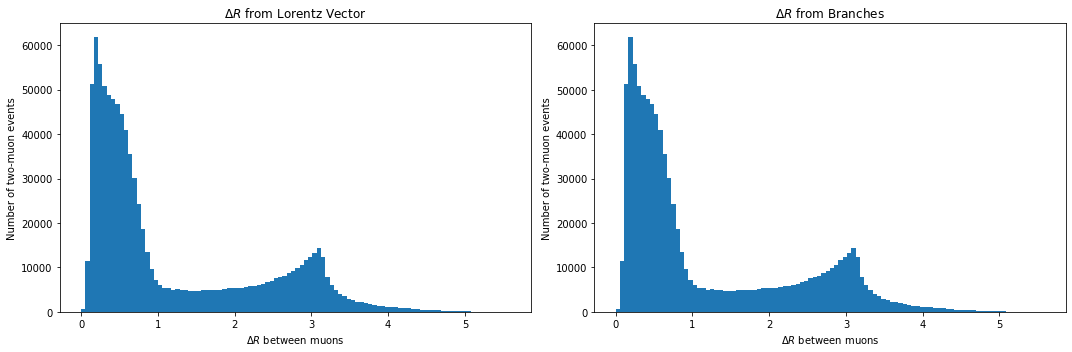

In [14]:
#No cuts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

deltaR = mu1p_nocuts.delta_r(mu2p_nocuts)
# deltaR = np.round(deltaR, 2)
axes[0].hist(deltaR, bins=100)
axes[0].set_title('$\Delta R$ from Lorentz Vector')
axes[0].set_xlabel('$\Delta R$ between muons')
axes[0].set_ylabel('Number of two-muon events')


deltarR_branches = branches['dimuon_dR'].flatten()
# deltarR_branches = np.round(deltarR_branches, 2)
axes[1].hist(deltarR_branches, bins=100)
axes[1].set_title('$\Delta R$ from Branches')
axes[1].set_xlabel('$\Delta R$ between muons')
axes[1].set_ylabel('Number of two-muon events')

fig.tight_layout()


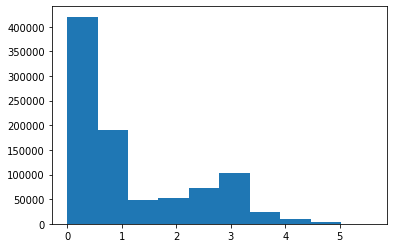

[4.20241e+05 1.91328e+05 4.89700e+04 5.25970e+04 7.34830e+04 1.03104e+05
 2.40330e+04 8.86900e+03 2.66000e+03 2.79000e+02]
[4.20241e+05 1.91328e+05 4.89700e+04 5.25970e+04 7.34830e+04 1.03104e+05
 2.40330e+04 8.86900e+03 2.66000e+03 2.79000e+02]


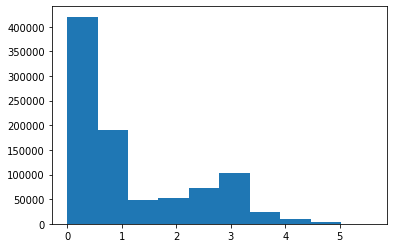

In [15]:
(n, bins, patches) = plt.hist(deltaR, bins=10)
plt.show()
(n1, bins1, patches1) = plt.hist(deltarR_branches, bins=10)
print(n)
print(n1)

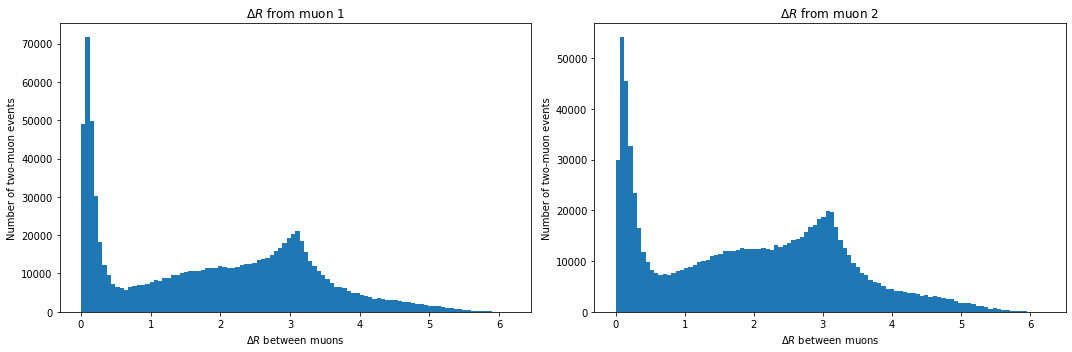

In [16]:
#delta R from each muon to closest jet
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].hist(branches['dRmuon1_closestjet'].flatten(), bins=100)
axes[0].set_title('$\Delta R$ from muon 1')
axes[0].set_xlabel('$\Delta R$ between muons')
axes[0].set_ylabel('Number of two-muon events')

axes[1].hist(branches['dRmuon2_closestjet'].flatten(), bins=100)
axes[1].set_title('$\Delta R$ from muon 2')
axes[1].set_xlabel('$\Delta R$ between muons')
axes[1].set_ylabel('Number of two-muon events')

fig.tight_layout()

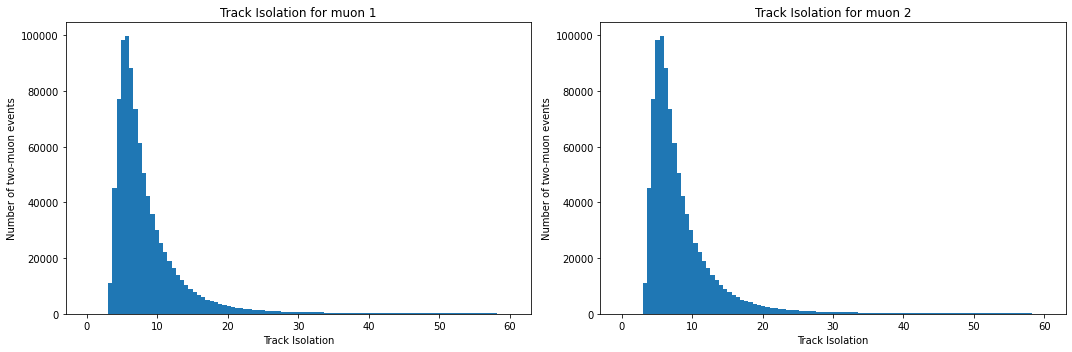

In [17]:
#iso track for each muon
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].hist(branches['muon1_trkiso'], bins=100, range=(0,60))
axes[0].set_title('Track Isolation for muon 1')
axes[0].set_xlabel('Track Isolation')
axes[0].set_ylabel('Number of two-muon events')

axes[1].hist(branches['muon1_trkiso'], bins=100, range=(0,60))
axes[1].set_title('Track Isolation for muon 2')
axes[1].set_xlabel('Track Isolation')
axes[1].set_ylabel('Number of two-muon events')

fig.tight_layout()

# Limit to 2 muons, OS

In [18]:
###make Lorentz vectors                                                                                                                                                              

#select only events with 2 muons, put them in a table, make lorentz vector                                                                                                           
two_muon_events = (branches['num_muons'] == 2)
two_muons_table = table[two_muon_events]
print("two muuons table")
print(two_muons_table)
print("# of rows, cols", len(two_muons_table), len(two_muons_table.columns))
print("# of rows and cols", two_muons_table.shape)
print("# of elements", two_muons_table.size)


two muuons table
[<Row 0> <Row 1> <Row 2> ... <Row 925561> <Row 925562> <Row 925563>]
# of rows, cols 884286 40
# of rows and cols (884286,)
# of elements 884286


In [19]:
#get invariant mass and deltaR
mu1p = uproot3_methods.TLorentzVectorArray.from_ptetaphim(two_muons_table['muon1_pt'], two_muons_table['muon1_eta'], two_muons_table['muon1_phi'], 0.1056583745)
mu2p = uproot3_methods.TLorentzVectorArray.from_ptetaphim(two_muons_table['muon2_pt'], two_muons_table['muon2_eta'], two_muons_table['muon2_phi'], 0.1056583745)
parentp = mu1p + mu2p

In [50]:
#cut to only include opposite sign muons, apply cut to dimuon 4-vectors                                                                                                              
OS_muons = two_muons_table['muon1_q'] != two_muons_table['muon2_q']
dimuon_p4 = parentp[OS_muons]

# Make Mass Plots

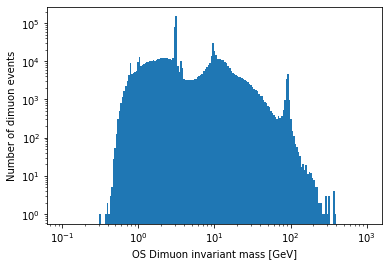

In [21]:
#OS, dimuon mass
plt.hist(dimuon_p4.mass, bins=np.logspace(np.log10(0.1), np.log10(1000), 200))
plt.xlabel('OS Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [29]:
#Add pt, eta, iso cuts
#these cuts return true/false - true means keep that event, false means don't use it
muon1_pt_cut = abs(two_muons_table['muon1_pt']) >= 3
muon2_pt_cut = abs(two_muons_table['muon2_pt']) >= 3
muon1_eta_cut = abs(two_muons_table['muon1_eta']) <= 2.4
muon2_eta_cut = abs(two_muons_table['muon2_eta']) <= 2.4
muon1_iso_cut = abs(two_muons_table['muon1_trkiso']) >= 0.15
muon2_iso_cut = abs(two_muons_table['muon2_trkiso']) >= 0.15
dimuon_all_cuts = muon1_pt_cut & muon2_pt_cut & muon1_eta_cut & muon2_eta_cut & muon1_iso_cut & muon2_iso_cut

dimuon_p4_w_cuts = parentp[dimuon_all_cuts]

print(muon1_pt_cut.sum())
print(muon2_pt_cut.sum())
print(muon1_eta_cut.sum())
print(muon2_eta_cut.sum())
print(dimuon_all_cuts.sum())

884286
884286
884286
884286
884286


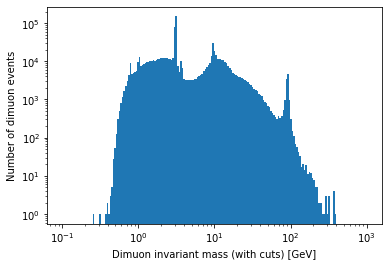

In [23]:
plt.hist(dimuon_p4_w_cuts.mass, bins=np.logspace(np.log10(0.1), np.log10(1000), 200))
plt.xlabel('Dimuon invariant mass (with cuts) [GeV]')
plt.ylabel('Number of dimuon events')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Other Variable Plots

### No Cuts

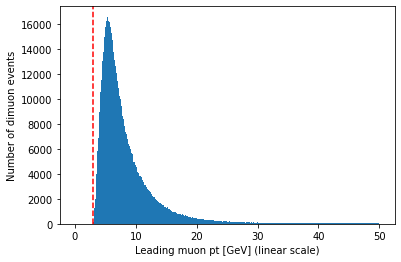

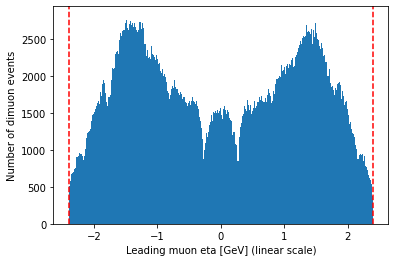

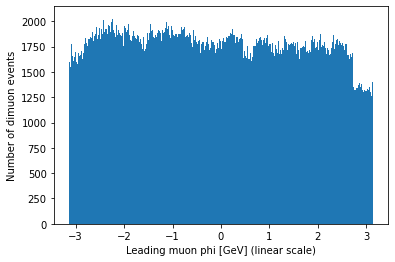

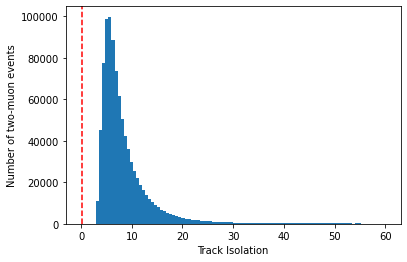

In [42]:
#Muon 1
plt.hist(mu1p.pt, bins=500, range=(0,50))
plt.xlabel('Leading muon pt [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.axvline(x = 3, linestyle = '--', color = 'r', label = 'Cut at %f' %3)
plt.show()

plt.hist(mu1p.eta, bins=500)
plt.xlabel('Leading muon eta [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.axvline(x = 2.4, linestyle = '--', color = 'r', label = 'Cut at %f' %2.4)
plt.axvline(x = -2.4, linestyle = '--', color = 'r', label = 'Cut at %f' %-2.4)
plt.show()

plt.hist(mu1p.phi, bins=500)
plt.xlabel('Leading muon phi [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.show()


plt.hist(branches['muon1_trkiso'], bins=100, range=(0,60))
plt.xlabel('Track Isolation')
plt.ylabel('Number of two-muon events')
plt.axvline(x = 0.15, linestyle = '--', color = 'r', label = 'Cut at %f' %0.15)
plt.show()

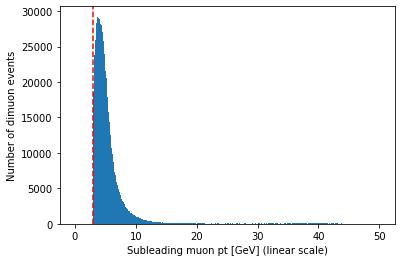

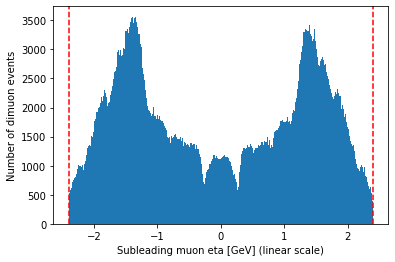

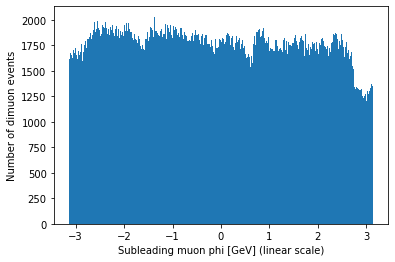

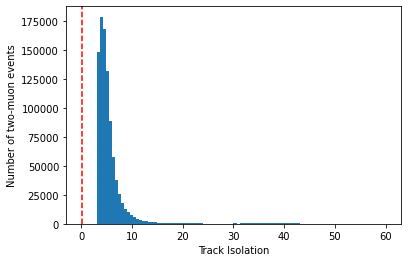

In [45]:
#Muon 2
plt.hist(mu2p.pt, bins=500, range=(0,50))
plt.xlabel('Subleading muon pt [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.axvline(x = 3, linestyle = '--', color = 'r', label = 'Cut at %f' %3)
plt.show()

plt.hist(mu2p.eta, bins=500)
plt.xlabel('Subleading muon eta [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.axvline(x = 2.4, linestyle = '--', color = 'r', label = 'Cut at %f' %2.4)
plt.axvline(x = -2.4, linestyle = '--', color = 'r', label = 'Cut at %f' %-2.4)
plt.show()

plt.hist(mu2p.phi, bins=500)
plt.xlabel('Subleading muon phi [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.show()

plt.hist(branches['muon2_trkiso'], bins=100, range=(0,60))
plt.xlabel('Track Isolation')
plt.ylabel('Number of two-muon events')
plt.axvline(x = 0.15, linestyle = '--', color = 'r', label = 'Cut at %f' %0.15)
plt.show()

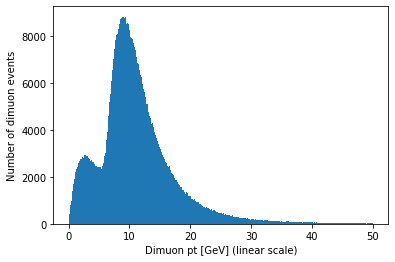

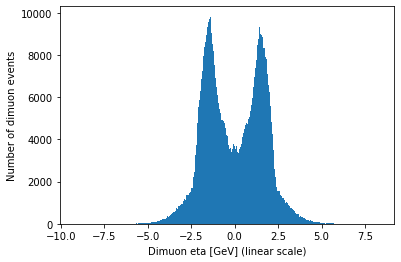

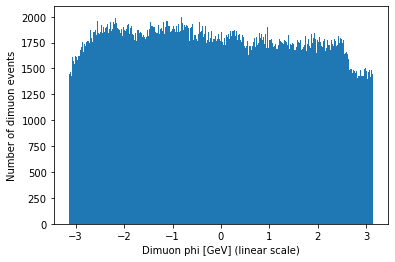

In [37]:
#Dimuon - No cuts
plt.hist(parentp.pt, bins=500, range=(0,50))
plt.xlabel('Dimuon pt [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
# plt.axvline(x = 3, linestyle = '--', color = 'r', label = 'Cut at %f' %3)
plt.show()

plt.hist(parentp.eta, bins=500)
plt.xlabel('Dimuon eta [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
# plt.axvline(x = 2.4, linestyle = '--', color = 'r', label = 'Cut at %f' %2.4)
# plt.axvline(x = -2.4, linestyle = '--', color = 'r', label = 'Cut at %f' %-2.4)
plt.show()

plt.hist(parentp.phi, bins=500)
plt.xlabel('Dimuon phi [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
# plt.axvline(x = 0.15, linestyle = '--', color = 'r', label = 'Cut at %f' %0.15)
# plt.axvline(x = -0.15, linestyle = '--', color = 'r', label = 'Cut at %f' %-0.15)
plt.show()


### Add cuts

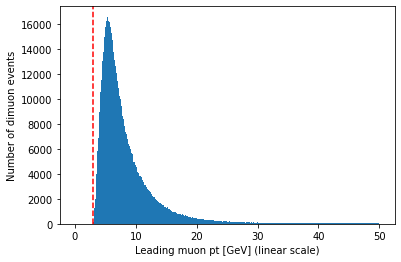

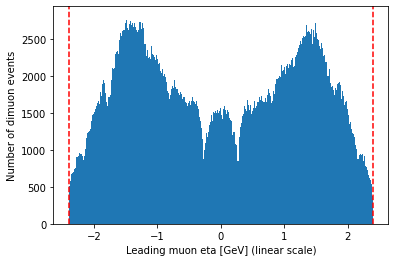

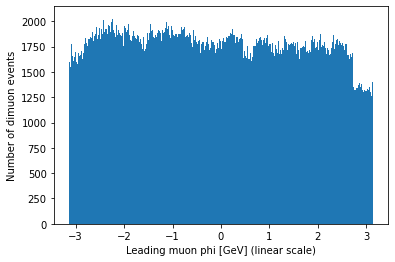

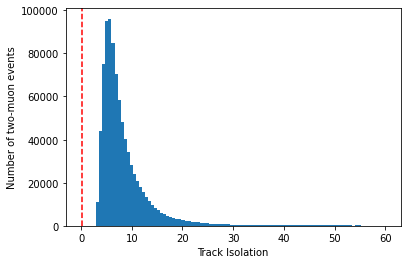

In [51]:
#Muon 1
plt.hist(mu1p[dimuon_all_cuts].pt, bins=500, range=(0,50))
plt.xlabel('Leading muon pt [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.axvline(x = 3, linestyle = '--', color = 'r', label = 'Cut at %f' %3)
plt.show()

plt.hist(mu1p[dimuon_all_cuts].eta, bins=500)
plt.xlabel('Leading muon eta [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.axvline(x = 2.4, linestyle = '--', color = 'r', label = 'Cut at %f' %2.4)
plt.axvline(x = -2.4, linestyle = '--', color = 'r', label = 'Cut at %f' %-2.4)
plt.show()

plt.hist(mu1p[dimuon_all_cuts].phi, bins=500)
plt.xlabel('Leading muon phi [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.show()

mu1trkiso = two_muons_table['muon1_trkiso'][muon1_iso_cut]
plt.hist(mu1trkiso, bins=100, range=(0,60))
plt.xlabel('Track Isolation')
plt.ylabel('Number of two-muon events')
plt.axvline(x = 0.15, linestyle = '--', color = 'r', label = 'Cut at %f' %0.15)
plt.show()

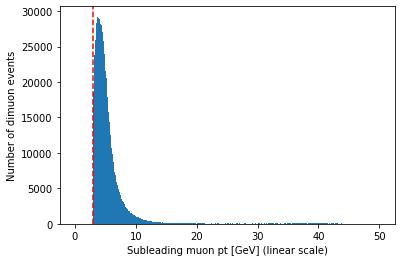

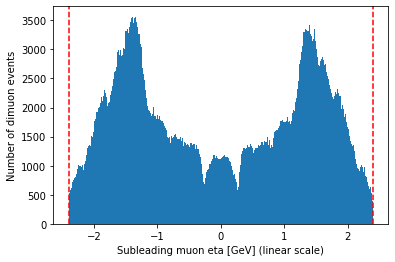

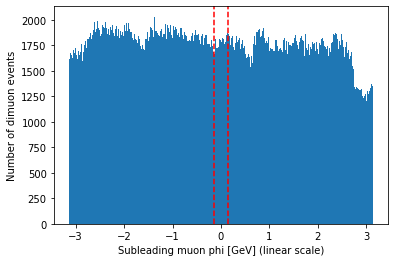

In [39]:
#Muon 2
plt.hist(mu2p[dimuon_all_cuts].pt, bins=500, range=(0,50))
plt.xlabel('Subleading muon pt [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.axvline(x = 3, linestyle = '--', color = 'r', label = 'Cut at %f' %3)
plt.show()

plt.hist(mu2p[dimuon_all_cuts].eta, bins=500)
plt.xlabel('Subleading muon eta [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.axvline(x = 2.4, linestyle = '--', color = 'r', label = 'Cut at %f' %2.4)
plt.axvline(x = -2.4, linestyle = '--', color = 'r', label = 'Cut at %f' %-2.4)
plt.show()

plt.hist(mu2p[dimuon_all_cuts].phi, bins=500)
plt.xlabel('Subleading muon phi [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.show()

mu1trkiso = two_muons_table['muon2_trkiso'][muon2_iso_cut]
plt.hist(mu2trkiso, bins=100, range=(0,60))
plt.xlabel('Subleading MUTrack Isolation')
plt.ylabel('Number of two-muon events')
plt.axvline(x = 0.15, linestyle = '--', color = 'r', label = 'Cut at %f' %0.15)
plt.show()

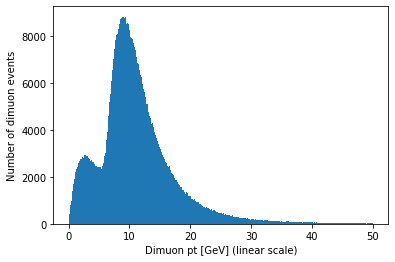

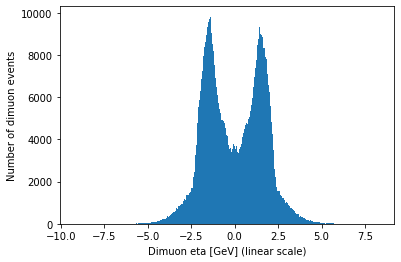

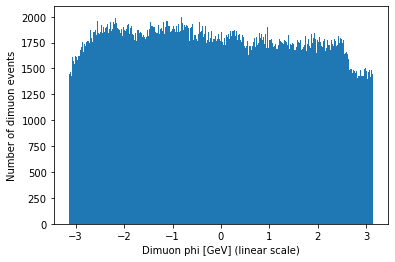

In [30]:
#Dimuon - Add pt, eta, iso cuts
plt.hist(dimuon_p4_w_cuts.pt, bins=500, range=(0,50))
plt.xlabel('Dimuon pt [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.show()

plt.hist(dimuon_p4_w_cuts.eta, bins=500)
plt.xlabel('Dimuon eta [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.show()

plt.hist(dimuon_p4_w_cuts.phi, bins=500)
plt.xlabel('Dimuon phi [GeV] (linear scale)')
plt.ylabel('Number of dimuon events')
plt.show()